In [2]:
# Librerías

# Preprocesamiento de imágenes
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# Modelos 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# Análisis de cluster y reducción de dimensión
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Otros necesarios
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [4]:
# Cambio de directorio
path = r"C:\Users\gonza\Desktop\Cluster Arte\Imágenes\Imágenes"
os.chdir(path)

In [6]:
# Vector de imágenes
images = []

with os.scandir(path) as files:    
    for file in files:
        images.append(file.name)

In [43]:
images

['caravaggio1.jpg',
 'caravaggio3.jpg',
 'caravaggio4.jpg',
 'caravaggio5.jpg',
 'caravaggio6.jpg',
 'Cezanne1.jpg',
 'Cezanne2.jpg',
 'Cezanne3.jpg',
 'Cezanne4.jpg',
 'Cezanne5.jpg',
 'Cezanne6.jpg',
 'Cezanne7.jpg',
 'JG1.jpg',
 'JG2.jpg',
 'JG3.jpg',
 'JG4.jpg',
 'JG5.jpg',
 'JG6.jpg',
 'Picasso1.jpg',
 'Picasso2.jpg',
 'Picasso3.jpg',
 'Picasso4.jpg',
 'Picasso5.jpg',
 'Picasso6.jpg',
 'Picasso7.jpg',
 'Picasso9.jpg',
 'Rembrandt1.jpg',
 'Rembrandt2.jpg',
 'Rembrandt3.jpg',
 'Rembrandt4.jpg',
 'Rembrandt5.jpg',
 'Rembrandt6.jpg',
 'VG1.jpg',
 'VG2.jpg',
 'VG3.jpg',
 'VG4.jpg',
 'VG5.jpg',
 'VG6.jpg',
 'VG7.jpg',
 'VG8.jpg',
 'VG9.jpg']

Las imágenes corresponden a pinturas de tres estilos distintos: cubismo, cubismo e impresionismo (post)

(-0.5, 209.5, 268.5, -0.5)

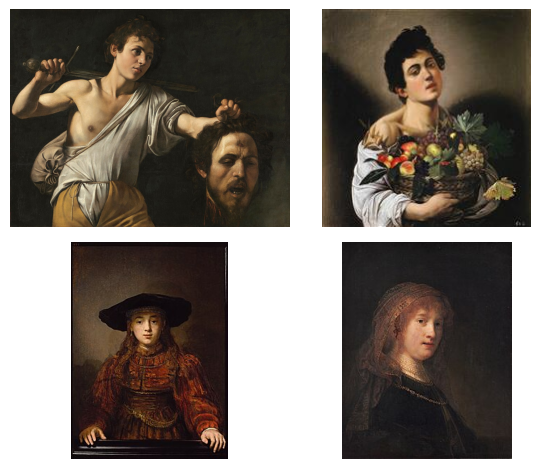

In [51]:
f, axarr = plt.subplots(2, 2, tight_layout=False)
axarr[0,0].imshow(load_img(images[0]))
axarr[0,0].axis('off')
axarr[0,1].imshow(load_img(images[1]))
axarr[0,1].axis('off')
axarr[1,0].imshow(load_img(images[28]))
axarr[1,0].axis('off')
axarr[1,1].imshow(load_img(images[29]))
axarr[1,1].axis('off')

(-0.5, 749.5, 596.5, -0.5)

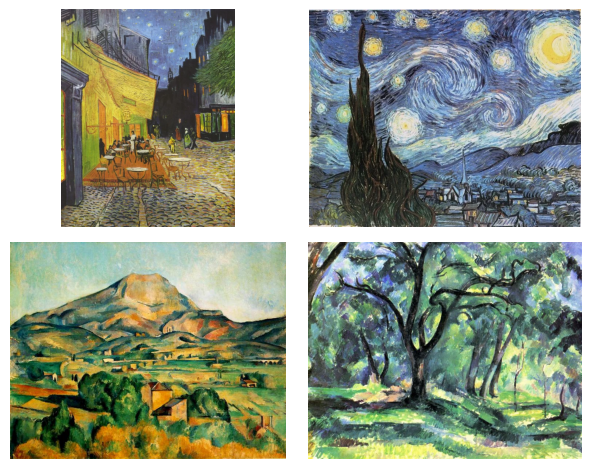

In [57]:
f, axarr = plt.subplots(2, 2, tight_layout=False)
axarr[0,0].imshow(load_img(images[35]))
axarr[0,0].axis('off')
axarr[0,1].imshow(load_img(images[36]))
axarr[0,1].axis('off')
axarr[1,0].imshow(load_img(images[5]))
axarr[1,0].axis('off')
axarr[1,1].imshow(load_img(images[8]))
axarr[1,1].axis('off')

(-0.5, 911.5, 972.5, -0.5)

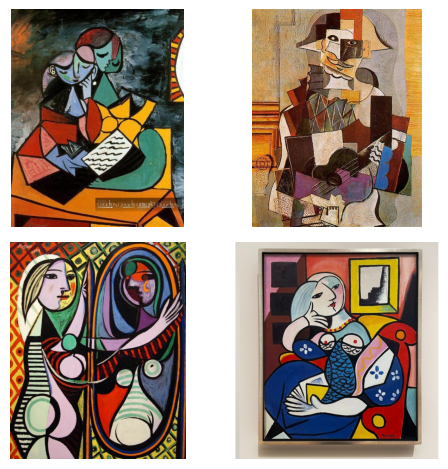

In [61]:
f, axarr = plt.subplots(2, 2, tight_layout=False)
axarr[0,0].imshow(load_img(images[21]))
axarr[0,0].axis('off')
axarr[0,1].imshow(load_img(images[22]))
axarr[0,1].axis('off')
axarr[1,0].imshow(load_img(images[24]))
axarr[1,0].axis('off')
axarr[1,1].imshow(load_img(images[25]))
axarr[1,1].axis('off')

In [8]:
# Pre-procesamiento de imágenes

model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

def extract_features(file, model):
    
    # Estandarización del input
    img = load_img(file, target_size=(224,224))
    # Conversión de formato para lectura en otras funciones numpy
    img = np.array(img) 
    # Re-modelado de los datos -> reshape(número de samples, dimensión (1), dimensión (2), canales - colores)
    reshaped_img = img.reshape(1,224,224,3) 
    # Preparación de la imagen al modelo
    imgx = preprocess_input(reshaped_img)
    # Extracción de características de interés
    features = model.predict(imgx, use_multiprocessing=True)
    
    return features

In [10]:
# Aplicación de la extracción de características
data = {}
for image in images:
    
    feat = extract_features(image, model)
    data[image] = feat
    
filenames = np.array(list(data.keys()))

1/1 [==============================] - 0s 110ms/step


In [11]:
# Características
feat = np.array(list(data.values()))
feat.shape

feat = feat.reshape(-1,4096)
feat.shape

# Aplicación de reducción de dimensionalidad (PCA)
pca = PCA(n_components=15)
pca.fit(feat)
x = pca.transform(feat)

C:\Users\gonza\anaconda3\envs\Spyder\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Para n_clusters =  3 el índice de Silhouette es : 0.14993826


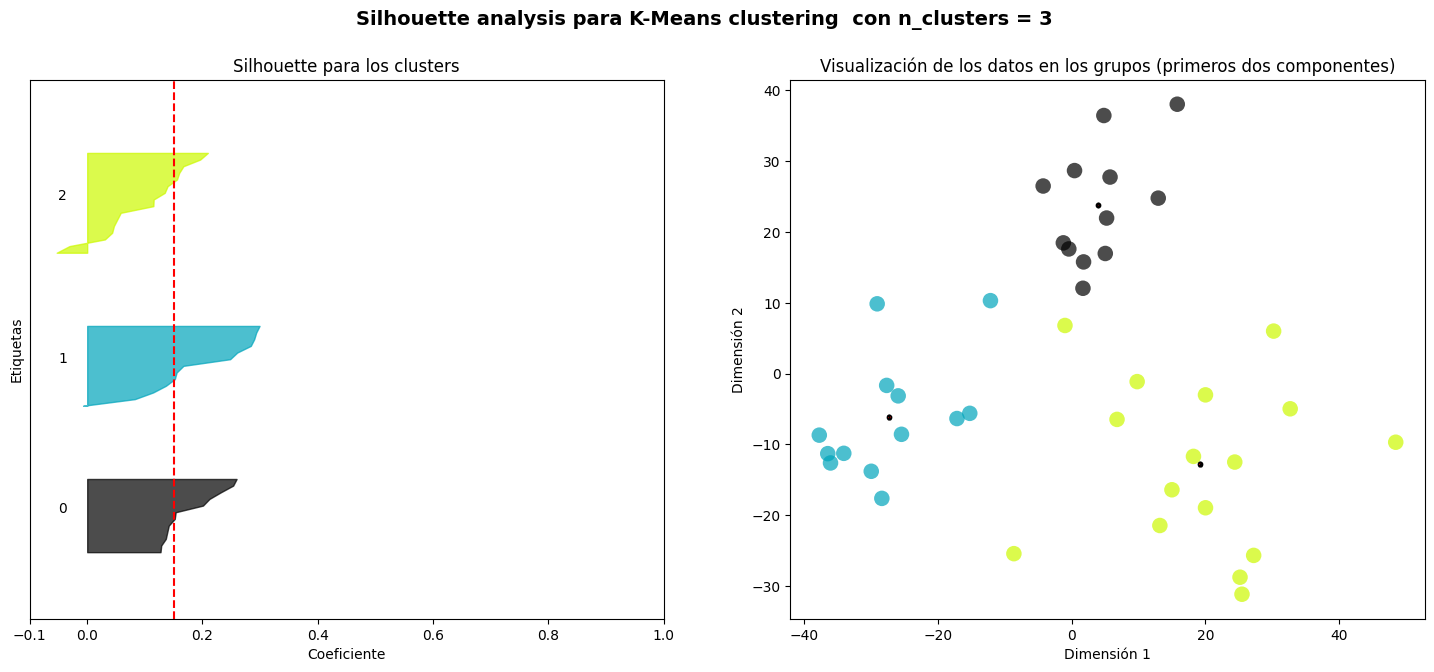

In [18]:
range_clusters = [3]
for n_clusters in range_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters = n_clusters, random_state = 10)
    cluster_labels = clusterer.fit_predict(x)
    
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        'Para n_clusters = ',
        n_clusters,
        'el índice de Silhouette es :',
        silhouette_avg
    )
    
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    
    y_lower = 10

    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette para los clusters")
    ax1.set_xlabel("Coeficiente")
    ax1.set_ylabel("Etiquetas")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x[:, 0], x[:, 1], marker=".", s=500, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="red",
        alpha=1,
        s=10,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=10, edgecolor="k")

    ax2.set_title("Visualización de los datos en los grupos (primeros dos componentes)")
    ax2.set_xlabel("Dimensión 1")
    ax2.set_ylabel("Dimensión 2")

    plt.suptitle(
        "Silhouette analysis para K-Means clustering  con n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


grupo 1
grupo 2
grupo 3


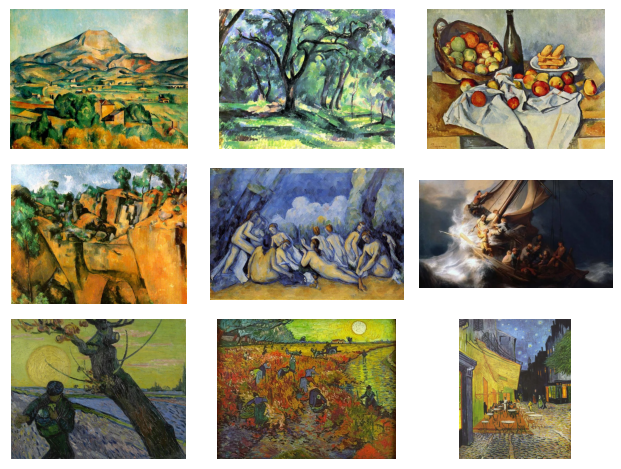

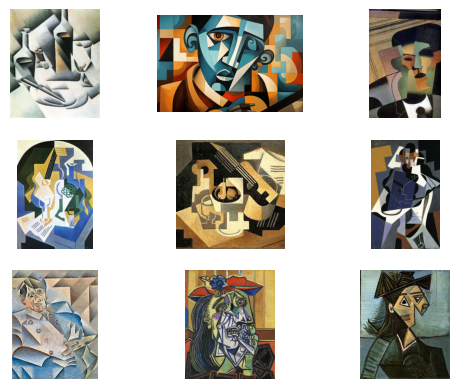

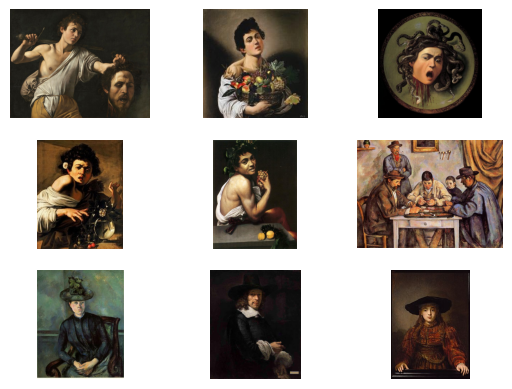

In [21]:
# Selección de tres clusters
# visualización de algunos grupos

kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 22)
kmeans.fit(x)

kmeans.labels_

groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

print('grupo 1')
k = 0
f, axarr = plt.subplots(3, 3, tight_layout=True)
for i in range(3):
    for j in range(3):
        axarr[i, j].imshow(load_img(groups[0][k]))
        axarr[i, j].axis('off')
        k = k+1

print('grupo 2')
k = 0
f, axarr = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        axarr[i, j].imshow(load_img(groups[1][k]))
        axarr[i, j].axis('off')
        k = k+1

print('grupo 3')
k = 0
f, axarr = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        axarr[i, j].imshow(load_img(groups[2][k]))
        axarr[i, j].axis('off')
        k = k+1